In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    PolynomialFeatures
)
from sklearn.datasets import (
    make_classification,
    make_regression,
    make_blobs
)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    LogisticRegressionCV,
    SGDRegressor,
    SGDClassifier,
    Ridge,
    RidgeCV,
    Lasso,
    LassoCV,
    ElasticNet,
    ElasticNetCV
)
from sklearn.svm import (
    SVR,
    SVC
)
from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor
)
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor
)
from sklearn.naive_bayes import(
    GaussianNB,
    MultinomialNB,
    BernoulliNB
)
from sklearn import tree
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    AdaBoostClassifier,
    AdaBoostRegressor,
    ExtraTreesClassifier,
    ExtraTreesRegressor,
    HistGradientBoostingClassifier,
    HistGradientBoostingRegressor,
    BaggingClassifier,
    BaggingRegressor,
    VotingClassifier,
    VotingRegressor
)

# from xgboost import XGBClassifier, XGBRegressor
# from lightgbm import LGBMClassifier, LGBMRegressor
# from catboost import CatBoostClassifier, CatBoostRegressor

# from sklearn.discriminant_analysis import (
#     LinearDiscriminantAnalysis,
#     QuadraticDiscriminantAnalysis
# )

from sklearn.neural_network import (
    MLPClassifier,
    MLPRegressor
)


from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_squared_log_error,
    median_absolute_error
)
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [6]:
x,y=make_blobs(
    n_samples=1000,
    n_features=3,
    centers=4,
    cluster_std=1.5,
    random_state=42
)

In [9]:
df=pd.DataFrame(x,columns=['X1','X2','X3'])
df['y']=y

In [10]:
df.head()

,X1,X2,X3,y
0,-8.714668,5.137196,1.558487,2
1,3.006457,-11.532485,8.714016,3
2,1.858093,-8.453127,10.316900,3
3,-5.219405,8.500429,1.993410,2
4,4.526492,-6.518497,-2.977585,1


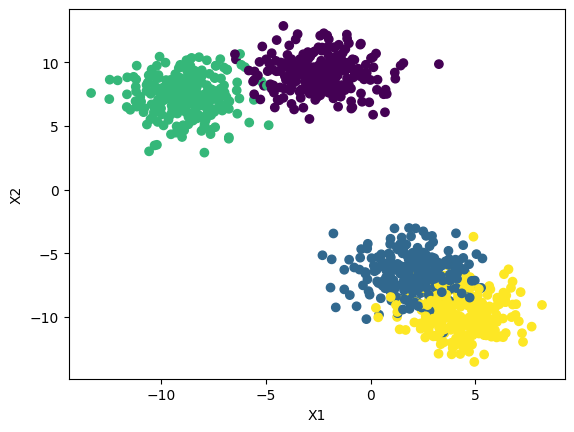

In [15]:
plt.scatter(df["X1"],df["X2"],c=df["y"])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [11]:
x_train,x_test=train_test_split(df,test_size=0.2,random_state=143)

In [12]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [13]:
wcss=[]
n=10

for k in range(2,n):
  kmeans=KMeans(
      n_clusters=k,
      init="k-means++",
      random_state=42
  )
  kmeans.fit(x_train_scaled)
  wcss.append(kmeans.inertia_)

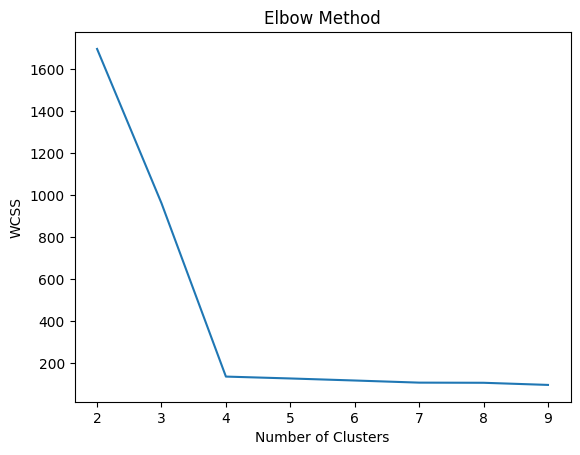

In [26]:
plt.plot(range(2,n),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
!pip install kneed

In [23]:
from kneed import KneeLocator

In [24]:
kl=KneeLocator(
    range(2,n),
    wcss,
    curve="convex",
    direction="decreasing"
)

In [25]:
kl.elbow

np.int64(4)

In [30]:
silhouette_coeff=[]
n=10

for i in range(2,10):
  kmeans=KMeans(
      n_clusters=i,
      init="k-means++"
  )
  kmeans.fit(x_train_scaled)
  silhouette_coeff.append(silhouette_score(x_train_scaled,kmeans.labels_))

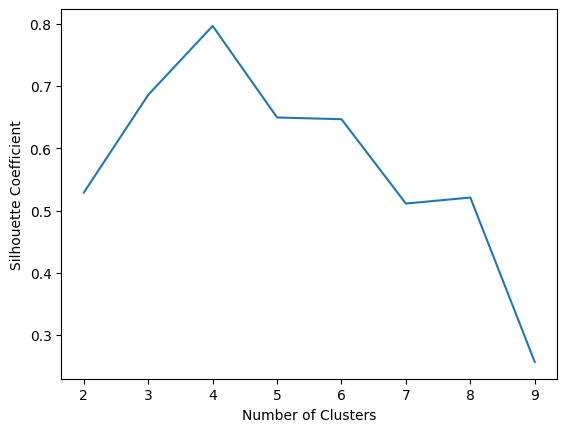

In [31]:
plt.plot(
    range(2,10),
    silhouette_coeff
)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [35]:
k=kl.elbow

In [36]:
scaler=StandardScaler()
pca=PCA(n_components=2)
kmeans=KMeans(n_clusters=k)

pipe=Pipeline([
    ("scaler",scaler),
    ("pca",pca),
    ("kmeans",kmeans)
])

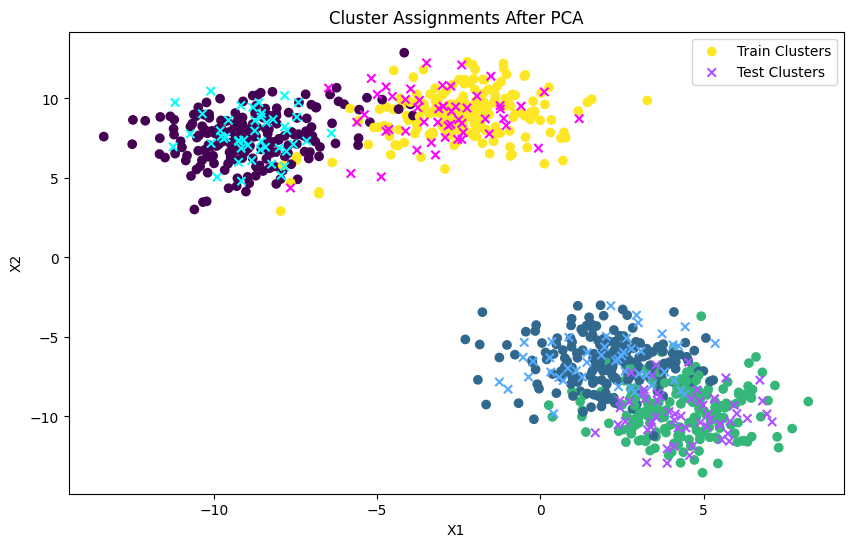

In [47]:
# Re-split df, not x (NumPy array)
x_train_df, x_test_df = train_test_split(df, test_size=0.2, random_state=42)

# Fit pipeline on x_train_df (just the features)
pipe.fit(x_train_df[['X1', 'X2', 'X3']])

# Predict
x_real = pipe.predict(x_train_df[['X1', 'X2', 'X3']])
y_pred = pipe.predict(x_test_df[['X1', 'X2', 'X3']])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_train_df["X1"], x_train_df["X2"], c=x_real, cmap='viridis', label='Train Clusters')
plt.scatter(x_test_df["X1"], x_test_df["X2"], c=y_pred, cmap='cool', marker='x', label='Test Clusters')
plt.title("Cluster Assignments After PCA")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()
